In [1]:
labels = ['airplane', 
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck'
          ]

In [2]:
#Įsikeliame reikalingas bibliotekas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

import keras

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [3]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

In [4]:
#Įsikeliame duomenis

(X_train, y_train), (X_test, y_test) =  keras.datasets.cifar10.load_data()

In [5]:
# normalizuojame
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle= True)

In [7]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_valid_one_hot = keras.utils.to_categorical(y_valid, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=10, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(80, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 20)        1820      
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                57680     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
h = model.fit(X_train, y_train_one_hot, validation_data=(X_valid, y_valid_one_hot), epochs=100, batch_size=64)

Epoch 1/100
704/704 [==============================] - 3s 4ms/step - loss: 1.7245 - accuracy: 0.3784 - val_loss: 1.4910 - val_accuracy: 0.4668
Epoch 2/100
704/704 [==============================] - 3s 4ms/step - loss: 1.4352 - accuracy: 0.4862 - val_loss: 1.4265 - val_accuracy: 0.4958
Epoch 3/100
704/704 [==============================] - 3s 4ms/step - loss: 1.3555 - accuracy: 0.5174 - val_loss: 1.3470 - val_accuracy: 0.5220
Epoch 4/100
704/704 [==============================] - 3s 4ms/step - loss: 1.2898 - accuracy: 0.5409 - val_loss: 1.3220 - val_accuracy: 0.5318
Epoch 5/100
704/704 [==============================] - 3s 4ms/step - loss: 1.2469 - accuracy: 0.5577 - val_loss: 1.2959 - val_accuracy: 0.5374
Epoch 6/100
704/704 [==============================] - 3s 4ms/step - loss: 1.2014 - accuracy: 0.5744 - val_loss: 1.2258 - val_accuracy: 0.5612
Epoch 7/100
704/704 [==============================] - 3s 4ms/step - loss: 1.1678 - accuracy: 0.5849 - val_loss: 1.2187 - val_accuracy: 0.5692

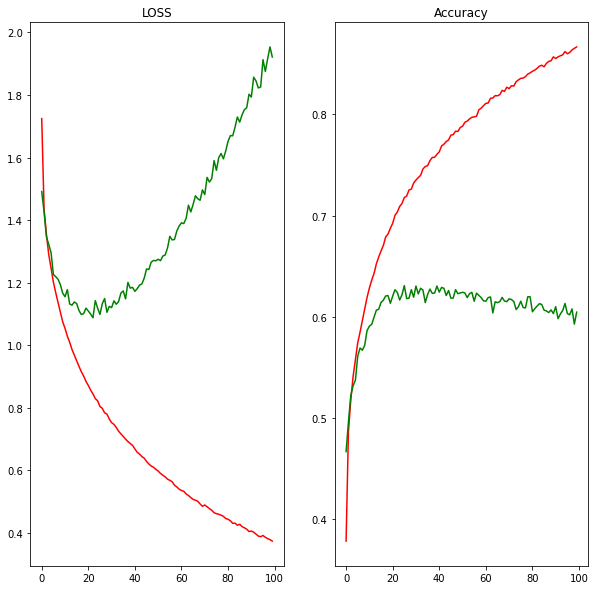

In [ ]:
# atvaizduojame grafiskai
plt.subplot(1, 2, 1)
plt.title('LOSS')
plt.plot(h.history['loss'], color='red')
plt.plot(h.history['val_loss'], color='green')
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(h.history['accuracy'], color='red')
plt.plot(h.history['val_accuracy'], color='green')

In [ ]:
predictions = model.predict(X_test)

            airplane  automobile  bird  cat  ...  frog  horse  ship  truck
airplane         628          36    60   25  ...    12     22   113     57
automobile        29         716     8   16  ...    10     14    55    144
bird              60          10   425  117  ...    65     58    27     25
cat               20          19    49  412  ...    73     58    19     41
deer              19           5    89   79  ...    63    100    18     10
dog               14          11    62  197  ...    34    106    15     11
frog               9          14    45  102  ...   666     19    16     20
horse             13          11    26   68  ...    17    653    13     30
ship              73          53    14   26  ...    14     10   705     74
truck             45         131    16   28  ...    13     27    58    653

[10 rows x 10 columns]


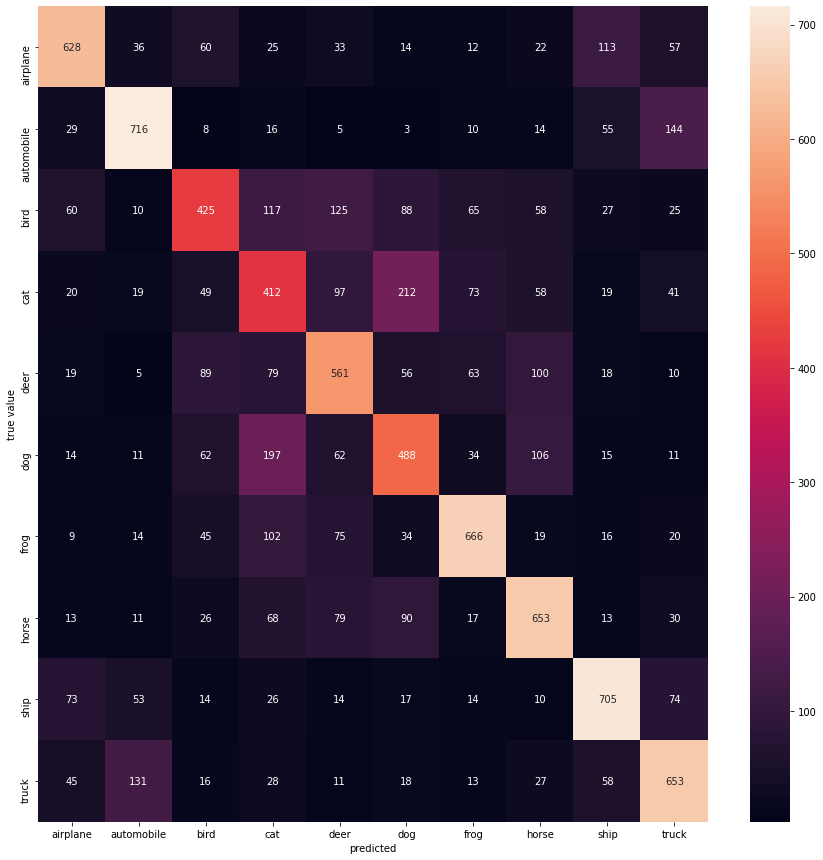

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
# suskaiciuojeme cf matrix
cf_matrix = confusion_matrix(y_test_one_hot.argmax(axis=1), predictions.argmax(axis=1))
# konvertuojame i dataframe
df_cm = pd.DataFrame(cf_matrix, index=labels, columns=labels)
print(df_cm)
# plot'inam
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('predicted')
plt.ylabel('true value')
plt.show()

In [ ]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 2.0099 - accuracy: 0.5907


[2.0098624229431152, 0.5906999707221985]

In [ ]:
# nupiesti confusion matrix
# kia architektura

https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/#:~:text=CIFAR%2D10%20is%20an%20established,images%20in%20the%20official%20data.

In [ ]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)
 
#training
batch_size = 64
 
opt_rms = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)       

In [ ]:
h = model.fit_generator(datagen.flow(X_train, y_train_one_hot, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(X_test, y_test_one_hot), callbacks=[LearningRateScheduler(lr_schedule)])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/125
703/703 [==============================] - 30s 42ms/step - loss: 1.9646 - accuracy: 0.4039 - val_loss: 1.3444 - val_accuracy: 0.5684
Epoch 2/125
703/703 [==============================] - 29s 41ms/step - loss: 1.3424 - accuracy: 0.5650 - val_loss: 1.1448 - val_accuracy: 0.6365
Epoch 3/125
703/703 [==============================] - 29s 42ms/step - loss: 1.1358 - accuracy: 0.6348 - val_loss: 1.0821 - val_accuracy: 0.6843
Epoch 4/125
703/703 [==============================] - 29s 41ms/step - loss: 1.0206 - accuracy: 0.6756 - val_loss: 0.9892 - val_accuracy: 0.7048
Epoch 5/125
703/703 [==============================] - 29s 41ms/step - loss: 0.9439 - accuracy: 0.7026 - val_loss: 1.0501 - val_accuracy: 0.6882
Epoch 6/125
703/703 [==============================] - 29s 41ms/step - loss: 0.9021 - accuracy: 0.7190 - val_loss: 0.9339 - val_accuracy: 0.7284
Epoch 7/125
703/703 [==============================] -

In [ ]:
model.save('90perc_300kpar_model.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: 90perc_300kpar_model.model/assets


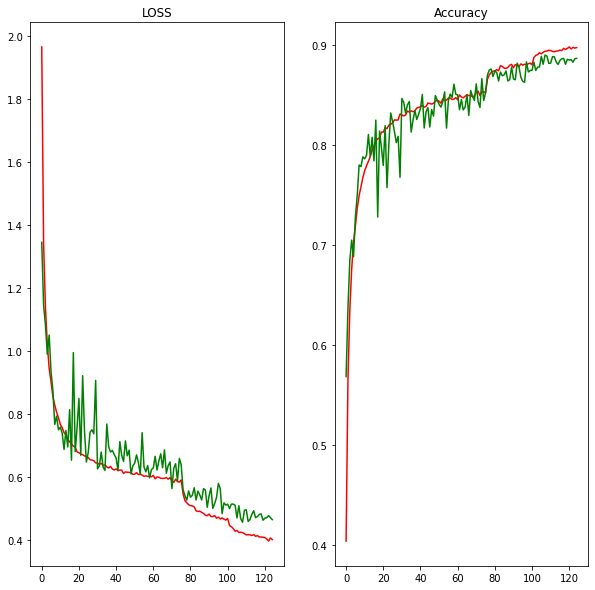

In [ ]:
# atvaizduojame grafiskai
plt.subplot(1, 2, 1)
plt.title('LOSS')
plt.plot(h.history['loss'], color='red')
plt.plot(h.history['val_loss'], color='green')
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(h.history['accuracy'], color='red')
plt.plot(h.history['val_accuracy'], color='green')

In [ ]:
predictions = model.predict(X_test)

            airplane  automobile  bird  cat  ...  frog  horse  ship  truck
airplane         901          12    12    1  ...     6      5    32     27
automobile         3         961     0    0  ...     2      0     1     33
bird              35           2   827   15  ...    49     17     3      7
cat               15          11    29  732  ...    70     25    16     15
deer               4           1    20   10  ...    40     21     2      0
dog                9           4    21   97  ...    33     34     0      6
frog               4           1     9    8  ...   969      2     1      2
horse              8           2     5    9  ...     8    936     2      4
ship              21          13     1    1  ...     4      2   936     20
truck              8          38     0    2  ...     0      0     6    945

[10 rows x 10 columns]


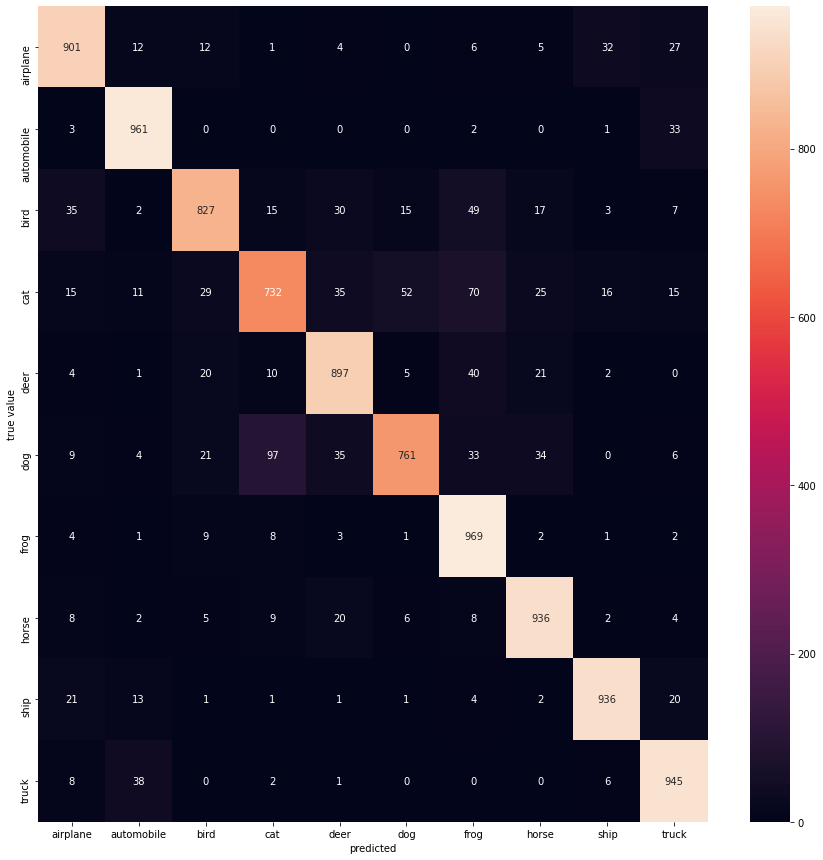

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
# suskaiciuojeme cf matrix
cf_matrix = confusion_matrix(y_test_one_hot.argmax(axis=1), predictions.argmax(axis=1))
# konvertuojame i dataframe
df_cm = pd.DataFrame(cf_matrix, index=labels, columns=labels)
print(df_cm)
# plot'inam
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('predicted')
plt.ylabel('true value')
plt.show()

In [ ]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 0.4643 - accuracy: 0.8865


[0.4642620086669922, 0.8865000009536743]

# simple net
5 mln parametru, uzmigo google collab.
paimtas is mokslinio straipsnio
https://arxiv.org/abs/1608.06037

In [8]:
import keras
import numpy as np
import keras.backend as K
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model
from keras import regularizers, optimizers
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_normal, RandomNormal, Zeros
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

In [9]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
    )
datagen.fit(X_train)

In [10]:
# create model
num_classes = 10
def create_model(s = 2, weight_decay = 1e-2, act="relu"):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal(), input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2)) # mokantis ismeta nurodyta skaiciu neuronu. (leidzia isvengti overfitting)
    
    # Block 2
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    
    # Block 3
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    
    # Block 4
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    # First Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    model.add(Dropout(0.2))
    
    
    # Block 5
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    
    # Block 6
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    
    # Block 7
    model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    # Second Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    
    
    # Block 8
    model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    
    # Block 9
    model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    # Third Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    
    
    # Block 10
    model.add(Conv2D(512, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))

    # Block 11  
    model.add(Conv2D(2048, (1,1), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(Activation(act))
    model.add(Dropout(0.2))
    
    # Block 12  
    model.add(Conv2D(256, (1,1), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(Activation(act))
    # Fourth Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    model.add(Dropout(0.2))


    # Block 13
    model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(Activation(act))
    # Fifth Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))

    # Final Classifier
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [11]:
model = create_model(act="relu")
batch_size = 128
epochs = 25
train = {}

# First training for 50 epochs - (0-50)
opt_adm = keras.optimizers.Adadelta(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt_adm, metrics=['accuracy'])
train["part_1"] = model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=batch_size),
                                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=2*epochs,
                                    verbose=1,validation_data=(X_test,y_test_one_hot))
print(train["part_1"].history)

Epoch 1/50
351/351 [==============================] - 37s 106ms/step - loss: 13.6928 - accuracy: 0.3086 - val_loss: 13.8168 - val_accuracy: 0.1003
Epoch 2/50
351/351 [==============================] - 37s 104ms/step - loss: 9.4051 - accuracy: 0.4567 - val_loss: 8.8390 - val_accuracy: 0.2055
Epoch 3/50
351/351 [==============================] - 36s 104ms/step - loss: 6.4377 - accuracy: 0.5530 - val_loss: 5.7516 - val_accuracy: 0.4362
Epoch 4/50
351/351 [==============================] - 36s 104ms/step - loss: 4.5553 - accuracy: 0.6231 - val_loss: 4.4112 - val_accuracy: 0.4720
Epoch 5/50
351/351 [==============================] - 36s 103ms/step - loss: 3.3856 - accuracy: 0.6744 - val_loss: 3.3952 - val_accuracy: 0.5675
Epoch 6/50
351/351 [==============================] - 36s 103ms/step - loss: 2.6438 - accuracy: 0.7111 - val_loss: 2.6546 - val_accuracy: 0.6154
Epoch 7/50
351/351 [==============================] - 37s 104ms/step - loss: 2.1554 - accuracy: 0.7366 - val_loss: 2.0380 - val_

In [12]:

# Training for 25 epochs more - (50-75)
opt_adm = keras.optimizers.Adadelta(lr=0.1*0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt_adm, metrics=['accuracy'])
train["part_2"] = model.fit_generator(datagen.flow(X_train, y_train_one_hot, batch_size=batch_size),
                                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=epochs,
                                    verbose=1,validation_data=(X_test,y_test_one_hot))
model.save("simplenet_trained_model.h5")
print(train["part_2"].history)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
351/351 [==============================] - 36s 102ms/step - loss: 0.5696 - accuracy: 0.9159 - val_loss: 0.5751 - val_accuracy: 0.9146
Epoch 2/25
351/351 [==============================] - 36s 102ms/step - loss: 0.5375 - accuracy: 0.9247 - val_loss: 0.5593 - val_accuracy: 0.9177
Epoch 3/25
351/351 [==============================] - 35s 101ms/step - loss: 0.5229 - accuracy: 0.9289 - val_loss: 0.5675 - val_accuracy: 0.9149
Epoch 4/25
351/351 [==============================] - 36s 103ms/step - loss: 0.5112 - accuracy: 0.9315 - val_loss: 0.5288 - val_accuracy: 0.9227
Epoch 5/25
351/351 [==============================] - 35s 101ms/step - loss: 0.5039 - accuracy: 0.9338 - val_loss: 0.5437 - val_accuracy: 0.9207
Epoch 6/25
351/351 [==============================] - 35s 101ms/step - loss: 0.4950 - accuracy: 0.9343 - val_loss: 0.5388 - val_accuracy: 0.9205
Epoch 7/25
351/351 [==============================] - 

In [13]:

# Training for 25 epochs more - (75-100)
opt_adm = keras.optimizers.Adadelta(lr=0.1*0.1*0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt_adm, metrics=['accuracy'])
train["part_3"] = model.fit_generator(datagen.flow(X_train, y_train_one_hot, batch_size=batch_size),
                                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=epochs,
                                    verbose=1,validation_data=(X_test,y_test_one_hot))
model.save("simplenet_trained_model.h5")
print(train["part_3"].history)

Epoch 1/25
351/351 [==============================] - 36s 102ms/step - loss: 0.3906 - accuracy: 0.9529 - val_loss: 0.4572 - val_accuracy: 0.9339
Epoch 2/25
351/351 [==============================] - 35s 100ms/step - loss: 0.3868 - accuracy: 0.9547 - val_loss: 0.4571 - val_accuracy: 0.9346
Epoch 3/25
351/351 [==============================] - 35s 100ms/step - loss: 0.3823 - accuracy: 0.9566 - val_loss: 0.4577 - val_accuracy: 0.9329
Epoch 4/25
351/351 [==============================] - 35s 101ms/step - loss: 0.3850 - accuracy: 0.9564 - val_loss: 0.4575 - val_accuracy: 0.9337
Epoch 5/25
351/351 [==============================] - 35s 100ms/step - loss: 0.3798 - accuracy: 0.9564 - val_loss: 0.4569 - val_accuracy: 0.9335
Epoch 6/25
351/351 [==============================] - 35s 100ms/step - loss: 0.3813 - accuracy: 0.9577 - val_loss: 0.4540 - val_accuracy: 0.9342
Epoch 7/25
351/351 [==============================] - 35s 100ms/step - loss: 0.3792 - accuracy: 0.9562 - val_loss: 0.4531 - val_ac

In [14]:

# Training for 25 epochs more  - (100-125)
opt_adm = keras.optimizers.Adadelta(lr=0.1*0.1*0.1*0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt_adm, metrics=['accuracy'])
train["part_4"] = model.fit_generator(datagen.flow(X_train, y_train_one_hot, batch_size=batch_size),
                                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=epochs,
                                    verbose=1,validation_data=(X_test,y_test_one_hot))
model.save("simplenet_trained_model.h5")
print(train["part_4"].history)

Epoch 1/25
351/351 [==============================] - 36s 101ms/step - loss: 0.3679 - accuracy: 0.9602 - val_loss: 0.4503 - val_accuracy: 0.9347
Epoch 2/25
351/351 [==============================] - 35s 100ms/step - loss: 0.3701 - accuracy: 0.9588 - val_loss: 0.4492 - val_accuracy: 0.9351
Epoch 3/25
351/351 [==============================] - 35s 99ms/step - loss: 0.3685 - accuracy: 0.9588 - val_loss: 0.4494 - val_accuracy: 0.9346
Epoch 4/25
351/351 [==============================] - 35s 99ms/step - loss: 0.3657 - accuracy: 0.9599 - val_loss: 0.4497 - val_accuracy: 0.9344
Epoch 5/25
351/351 [==============================] - 35s 99ms/step - loss: 0.3678 - accuracy: 0.9594 - val_loss: 0.4491 - val_accuracy: 0.9346
Epoch 6/25
351/351 [==============================] - 35s 99ms/step - loss: 0.3682 - accuracy: 0.9591 - val_loss: 0.4495 - val_accuracy: 0.9344
Epoch 7/25
351/351 [==============================] - 35s 98ms/step - loss: 0.3659 - accuracy: 0.9599 - val_loss: 0.4495 - val_accurac

In [20]:
loss = []
val_loss = []
acc = []
val_acc = []
for tr in train.values():
  print(tr)
  loss.extend(tr.history['loss'])
  val_loss.extend(tr.history['val_loss'])
  acc.extend(tr.history['accuracy'])
  val_acc.extend(tr.history['val_accuracy'])

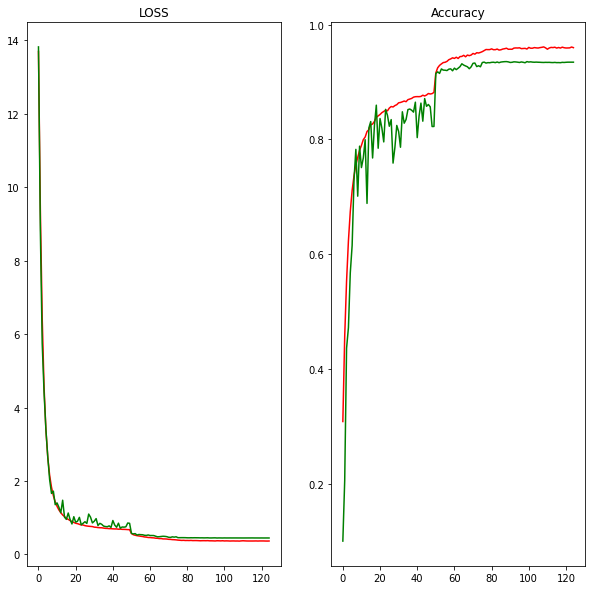

In [21]:
# atvaizduojame grafiskai
plt.subplot(1, 2, 1)
plt.title('LOSS')
plt.plot(loss, color='red')
plt.plot(val_loss, color='green')
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(acc, color='red')
plt.plot(val_acc, color='green')

In [22]:
predictions = model.predict(X_test)

            airplane  automobile  bird  cat  ...  frog  horse  ship  truck
airplane         940           4    14    2  ...     4      1    24     10
automobile         2         984     0    1  ...     0      0     2     11
bird              15           0   934    9  ...    19      4     1      1
cat                7           4    25  861  ...    23      6     5      6
deer               0           1    23   12  ...    13      9     0      1
dog                3           4    20   78  ...    12     13     2      3
frog               4           1     8    7  ...   975      2     1      0
horse              5           0    10    9  ...     0    954     2      3
ship              15           7     3    0  ...     0      0   966      9
truck              5          33     1    1  ...     3      0     8    949

[10 rows x 10 columns]


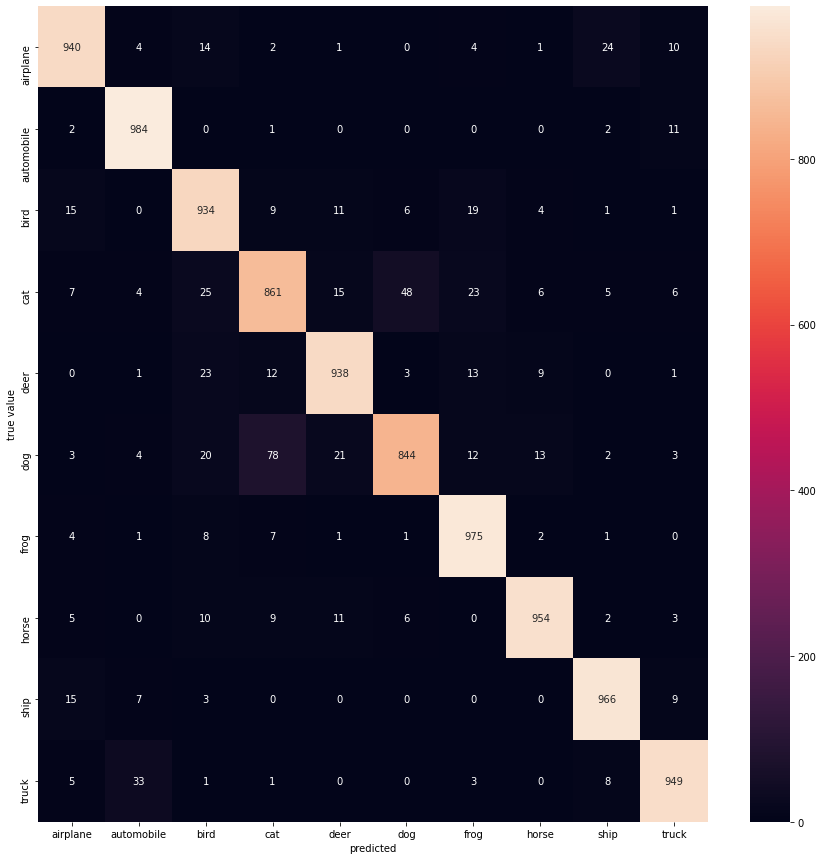

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
# suskaiciuojeme cf matrix
cf_matrix = confusion_matrix(y_test_one_hot.argmax(axis=1), predictions.argmax(axis=1))
# konvertuojame i dataframe
df_cm = pd.DataFrame(cf_matrix, index=labels, columns=labels)
print(df_cm)
# plot'inam
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('predicted')
plt.ylabel('true value')
plt.show()

In [24]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 3s 8ms/step - loss: 0.4486 - accuracy: 0.9345


[0.44862139225006104, 0.934499979019165]